## **ELECTION US PATTERN USING APRIORI ALGORITHM**

## **Data preparation**

In [ ]:
# Import modules.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default asthetic parameters.
sns.set()


In [ ]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anggizhaputri","key":"a3db9f13acccb247b53fe043c13df1d0"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [ ]:
!kaggle datasets download -d unanimad/us-election-2020

  0% 0.00/429k [00:00<?, ?B/s]
100% 429k/429k [00:00<00:00, 62.9MB/s]


In [ ]:
import zipfile,os
local_zip = '/content/us-election-2020.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/us-election')
zip_ref.close()

In [ ]:
base_dir = '/tmp/us-election/'
# Load orders dataset.
presidents = pd.read_csv(base_dir+'president_county_candidate.csv')


In [ ]:
# Print presidents header.
presidents

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
31143,Arizona,Maricopa County,Donald Trump,REP,995665,False
31144,Arizona,Maricopa County,Jo Jorgensen,LIB,31705,False
31145,Arizona,Mohave County,Donald Trump,REP,78535,True
31146,Arizona,Mohave County,Joe Biden,DEM,24831,False


In [ ]:
# Print presidents info.
presidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31148 entries, 0 to 31147
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        31148 non-null  object
 1   county       31148 non-null  object
 2   candidate    31148 non-null  object
 3   party        31148 non-null  object
 4   total_votes  31148 non-null  int64 
 5   won          31148 non-null  bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 1.2+ MB


Menghapus baris dari kolom kandidat selain Joe Biden

In [ ]:
presidents.drop(presidents.loc[presidents['candidate']=='Donald Trump'].index, inplace=True)
presidents.drop(presidents.loc[presidents['candidate']=='Jo Jorgensen'].index, inplace=True)
presidents.drop(presidents.loc[presidents['candidate']=='Howie Hawkins'].index, inplace=True)

Menghapus semua baris yang berisi False (Kekalahan Joe Biden) dari kolom won 

In [ ]:
presidents.drop(presidents.loc[presidents['won']==False].index, inplace=True)

In [ ]:
# Print presidents header.
presidents

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
12,District of Columbia,District of Columbia,Joe Biden,DEM,38037,True
19,District of Columbia,Ward 2,Joe Biden,DEM,28185,True
26,District of Columbia,Ward 3,Joe Biden,DEM,38436,True
...,...,...,...,...,...,...
31105,Arizona,Pima County,Joe Biden,DEM,304981,True
31112,Arizona,Santa Cruz County,Joe Biden,DEM,13138,True
31121,Arizona,Apache County,Joe Biden,DEM,23293,True
31127,Arizona,Coconino County,Joe Biden,DEM,44609,True


In [ ]:
transactions = presidents.groupby("county").state.unique()

transactions.head()

county
Abington                [Massachusetts]
Acton                   [Massachusetts]
Acworth                 [New Hampshire]
Adams                   [Massachusetts]
Adams County    [Mississippi, Colorado]
Name: state, dtype: object

In [ ]:
# Convert the pandas series to list of lists.
transactions = transactions.tolist()

## **Association Rules and Mining**

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
encoder.fit(transactions)

# Transform lists into one-hot encoded array.
onehot = encoder.transform(transactions)

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [ ]:
# Print header.
onehot

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,Wisconsin,Wyoming,Massachusetts_Vermont
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1239,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1240,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1241,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False



### **Compute the support metric**



$$support(X) = \frac{\text{number of transactions containing X}}{\text{total number of transactions}}$$

In [ ]:
# Print support metric over all rows for each column.
onehot.mean(axis=0)

Alabama                 0.010459
Alaska                  0.014481
Arizona                 0.004023
Arkansas                0.006436
California              0.028158
Colorado                0.020113
Connecticut             0.092518
Delaware                0.001609
District of Columbia    0.006436
Florida                 0.009654
Georgia                 0.024135
Hawaii                  0.003218
Idaho                   0.002414
Illinois                0.012068
Indiana                 0.004023
Iowa                    0.004827
Kansas                  0.004023
Kentucky                0.001609
Louisiana               0.008045
Maine                   0.198713
Maryland                0.008045
Massachusetts           0.243765
Michigan                0.008850
Minnesota               0.010459
Mississippi             0.021722
Missouri                0.003218
Montana                 0.005632
Nebraska                0.001609
Nevada                  0.001609
New Hampshire           0.089300
New Jersey

### **Compute the item count distribution over transactions**

* `onehot.sum(axis=1)` sums across the columns in a `DataFrame`. 

In [ ]:
# Print distribution of item counts.
onehot.sum(axis=1).value_counts()

1    1057
2     128
3      45
4       7
5       5
7       1
dtype: int64

**Insight:** Only 726 transactions contain more than one item category. We may want to consider whether aggregation discards too many multi-item itemsets.

### **Create a column for an itemset with multiple items**

* **We can create multi-item columns using the logical AND operation.**
  * `True & True = True`
  * `True & False = False`
  * `False & True = False`
  * `False & False = False`

In [ ]:
# Add sports_leisure and health_beauty to DataFrame.
onehot['Massachusetts_Vermont'] = onehot['Massachusetts'] & onehot['Vermont']

# Print support value.
onehot['Massachusetts_Vermont'].mean(axis = 0)

0.0418342719227675

### **Compute the confidence metric**

$$confidence(antecedent \rightarrow consequent)= \frac{support(antecedent, consequent)}{support(antecedent)}$$

In [ ]:
# Compute joint support for sports_leisure and health_beauty.
joint_support = (onehot['Massachusetts'] & onehot['Vermont']).mean()

# Print confidence metric for sports_leisure -> health_beauty.
joint_support / onehot['Massachusetts'].mean()

0.17161716171617164

In [ ]:
# Print confidence for health_beauty -> sports_leisure.
joint_support / onehot['Massachusetts'].mean()

0.17161716171617164

---
<center><h1> Q&A 3</h1> </center>

---

## **The Apriori Algorithm**

**The `mlxtend` module will enable us to apply the Apriori algorithm, perform pruning, and compute association rules.**

### **Applying the FP-Growth algorithm**

In [ ]:
from mlxtend.frequent_patterns import apriori

# Apply apriori algorithm to data with min support threshold of 0.01.
frequent_itemsets = apriori(onehot, min_support = 0.01)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.010459,(0)
1,0.014481,(1)
2,0.028158,(4)
3,0.020113,(5)
4,0.092518,(6)
5,0.024135,(10)
6,0.012068,(13)
7,0.198713,(19)
8,0.243765,(21)
9,0.010459,(23)


In [ ]:
# Apply apriori algorithm to data with min support threshold of 0.001.
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.010459,(Alabama)
1,0.014481,(Alaska)
2,0.004023,(Arizona)
3,0.006436,(Arkansas)
4,0.028158,(California)
...,...,...
116,0.001609,"(Vermont, New Hampshire, Massachusetts_Vermont..."
117,0.011263,"(Massachusetts, Vermont, New Hampshire, Massac..."
118,0.001609,"(Massachusetts, Vermont, Rhode Island, Massach..."
119,0.002414,"(Connecticut, Massachusetts_Vermont, New Hamps..."


In [ ]:
# Apply apriori algorithm to data with a two-item limit.
frequent_itemsets = apriori(onehot, min_support = 0.00005, max_len = 2, use_colnames = True)
# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.010459,(Alabama)
1,0.014481,(Alaska)
2,0.004023,(Arizona)
3,0.006436,(Arkansas)
4,0.028158,(California)
...,...,...
163,0.000805,"(Oregon, South Carolina)"
164,0.001609,"(Virginia, Pennsylvania)"
165,0.004023,"(Rhode Island, Vermont)"
166,0.001609,"(Rhode Island, Massachusetts_Vermont)"


### **Computing association rules from Apriori output**

* Use `association_rules()` to compute and prune association rules from output of `apriori()`.

In [ ]:
import mlxtend
from mlxtend.frequent_patterns import association_rules

# Recover association rules using support and a minimum threshold of 0.0001.
rules = association_rules(frequent_itemsets, min_threshold = 0.0001)

# Print rules header.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Arkansas),(Alabama),0.006436,0.010459,0.000805,0.125000,11.951923,0.000737,1.130904
1,(Alabama),(Arkansas),0.010459,0.006436,0.000805,0.076923,11.951923,0.000737,1.076361
2,(Colorado),(Alabama),0.020113,0.010459,0.000805,0.040000,3.824615,0.000594,1.030772
3,(Alabama),(Colorado),0.010459,0.020113,0.000805,0.076923,3.824615,0.000594,1.061545
4,(Georgia),(Alabama),0.024135,0.010459,0.002414,0.100000,9.561538,0.002161,1.099490
...,...,...,...,...,...,...,...,...,...
231,(Vermont),(Rhode Island),0.161706,0.022526,0.004023,0.024876,1.104300,0.000380,1.002409
232,(Rhode Island),(Massachusetts_Vermont),0.022526,0.041834,0.001609,0.071429,1.707418,0.000667,1.031871
233,(Massachusetts_Vermont),(Rhode Island),0.041834,0.022526,0.001609,0.038462,1.707418,0.000667,1.016573
234,(Vermont),(Massachusetts_Vermont),0.161706,0.041834,0.041834,0.258706,6.184080,0.035069,1.292559


**Notice that `association_rules` automatically computes seven metrics.**

### **Pruning association rules**

In [ ]:
# Recover association rules using confidence threshold of 0.01.
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.01)

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Arkansas),(Alabama),0.006436,0.010459,0.000805,0.125000,11.951923,0.000737,1.130904
1,(Alabama),(Arkansas),0.010459,0.006436,0.000805,0.076923,11.951923,0.000737,1.076361
2,(Colorado),(Alabama),0.020113,0.010459,0.000805,0.040000,3.824615,0.000594,1.030772
3,(Alabama),(Colorado),0.010459,0.020113,0.000805,0.076923,3.824615,0.000594,1.061545
4,(Georgia),(Alabama),0.024135,0.010459,0.002414,0.100000,9.561538,0.002161,1.099490
...,...,...,...,...,...,...,...,...,...
230,(Vermont),(Rhode Island),0.161706,0.022526,0.004023,0.024876,1.104300,0.000380,1.002409
231,(Rhode Island),(Massachusetts_Vermont),0.022526,0.041834,0.001609,0.071429,1.707418,0.000667,1.031871
232,(Massachusetts_Vermont),(Rhode Island),0.041834,0.022526,0.001609,0.038462,1.707418,0.000667,1.016573
233,(Vermont),(Massachusetts_Vermont),0.161706,0.041834,0.041834,0.258706,6.184080,0.035069,1.292559


In [ ]:
# Select rules with a consequent support above 0.095.
rules = rules[rules['consequent support'] > 0.095]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(Connecticut),(Maine),0.092518,0.198713,0.012068,0.130435,0.656399,-0.006317,0.921480
11,(Connecticut),(Massachusetts),0.092518,0.243765,0.020113,0.217391,0.891807,-0.002440,0.966300
17,(Connecticut),(Vermont),0.092518,0.161706,0.024940,0.269565,1.667013,0.009979,1.147665
28,(Massachusetts),(Maine),0.243765,0.198713,0.018504,0.075908,0.381996,-0.029936,0.867107
29,(Maine),(Massachusetts),0.198713,0.243765,0.018504,0.093117,0.381996,-0.029936,0.833884
...,...,...,...,...,...,...,...,...,...
348,"(Massachusetts_Vermont, Vermont, New Hampshire...",(Massachusetts),0.002414,0.243765,0.002414,1.000000,4.102310,0.001825,inf
352,"(Massachusetts_Vermont, Connecticut, Massachus...",(Vermont),0.002414,0.161706,0.002414,1.000000,6.184080,0.002023,inf
377,"(Massachusetts_Vermont, Vermont, New Hampshire...",(Massachusetts),0.001609,0.243765,0.001609,1.000000,4.102310,0.001217,inf
380,"(Massachusetts_Vermont, Vermont, Massachusetts...",(Maine),0.011263,0.198713,0.001609,0.142857,0.718913,-0.000629,0.934835


### **The leverage metric**

* **Leverage provides a sanity check.**
  * $support(antecedent, consequent)$ = joint support in data.
  * $support(antecedent) * support(consequent)$ = expected joint support for unrelated antecedent and consequent.

* **Leverage formula**
  * $$leverage(antecendent, consequent) = 
support(antecedent, consequent) - support(antecedent) * support(consequent)$$

* **For most problems, we will discard itemsets with negative leverage.**
  * Negative leverage means that the items appear together less frequently than we would expect if they were randomly and independently distributed across transactions.

In [ ]:
# Select rules with leverage higher than 0.0.
rules = rules[rules['leverage'] > 0.0]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(Connecticut),(Vermont),0.092518,0.161706,0.024940,0.269565,1.667013,0.009979,1.147665
38,(New Hampshire),(Massachusetts),0.089300,0.243765,0.026549,0.297297,1.219606,0.004780,1.076180
41,(Massachusetts),(Vermont),0.243765,0.161706,0.041834,0.171617,1.061294,0.002416,1.011965
42,(Vermont),(Massachusetts),0.161706,0.243765,0.041834,0.258706,1.061294,0.002416,1.020156
43,(Massachusetts_Vermont),(Massachusetts),0.041834,0.243765,0.041834,1.000000,4.102310,0.031637,inf
51,(New Hampshire),(Vermont),0.089300,0.161706,0.015286,0.171171,1.058536,0.000845,1.011420
60,(Rhode Island),(Vermont),0.022526,0.161706,0.004023,0.178571,1.104300,0.000380,1.020532
63,(Massachusetts_Vermont),(Vermont),0.041834,0.161706,0.041834,1.000000,6.184080,0.035069,inf
77,"(Connecticut, Maine)",(Vermont),0.012068,0.161706,0.004827,0.400000,2.473632,0.002876,1.397157
82,"(New Hampshire, Connecticut)",(Massachusetts),0.013677,0.243765,0.004827,0.352941,1.447874,0.001493,1.168727


**Insight:** The Apriori algorithm reduced the number of itemsets from $2^{71}$ to 113. Pruning allowed us to identify to a single association rule that could be useful for cross-promotional purposes: $\{home\_comfort\} \rightarrow \{bed\_bath\_table\}$.

### **Visualizing patterns in metrics**

* `sns.scatterplot()` creates a scatterplot from two columns in a `DataFrame`.

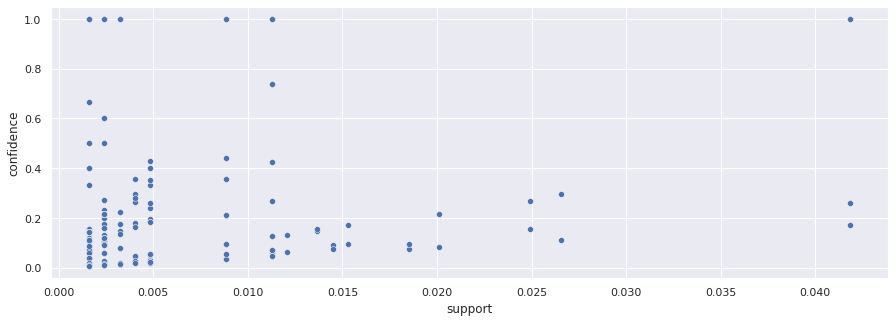

In [ ]:
# Recover association rules with a minimum support greater than 0.000001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.000001)

# Plot leverage against confidence.
plt.figure(figsize=(15,5))
sns.scatterplot(x="support", y="confidence", data=rules)

**Insight 1**: Leverage and confidence contain some of the same information about the strength of an association.